In [ ]:
!pip install "preliz[full,notebook]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.1 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.6/505.6 kB 30.3 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: nbclient
    Found existing installation: nbclient 0.10.0
    Uninstalling nbclient-0.10.0:
      Successfully uninstalled nbclient-0.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency con

In [ ]:
import preliz as pz
import numpy as np
import arviz as az
import pymc as pm

# Pass Completion Percentage
Daniel Jones is currently the starting quarterback for the New York Giants football team in the NFL. Since his entrance into the league in 2019, Jones showed leaderhsip on and off the field. In 2023, Jones lead the Giants to their first playoff berth in over 5 years.

There are a lot of analysts and fans who believe that Jones has been otherwise unsuccessful at QB so with the 24/25 season yet to begin, I will be finding his projected completion percentage.

For this, I will be using pass completion percentage(CMP PCT) to determine how good he is at throwing the ball.

Jones's average completion percentage is 67.5. The Giants have recently added some new recievers to their team, so I believe his CMP PCT will rise to 73% which will mean he will make 117 out of 160 passes. This number is assuming he throws the same amount of passes as last year.

# Modeling Percentage Using Priors

<Axes: >

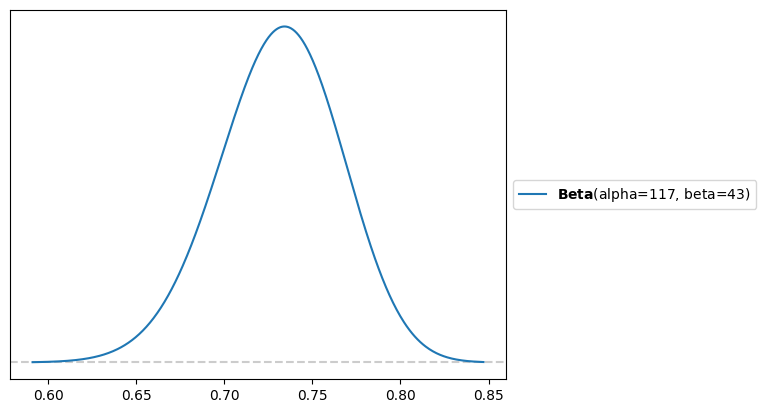

In [ ]:

pz.Beta(alpha=117,beta=43).plot_pdf()

In [29]:

cmppct_prior = pz.Beta(alpha=10,beta=3)


cmppct_prior_mode = (cmppct_prior.alpha - 1)/(cmppct_prior.alpha + cmppct_prior.beta - 2)


cmppct_prior.mean(), cmppct_prior.median(), cmppct_prior_mode

(0.7692307692307693, 0.7833135891735552, 0.8181818181818182)

<Axes: >

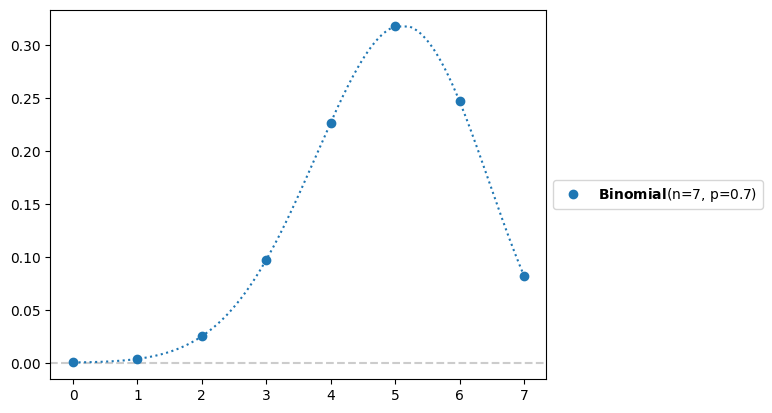

In [ ]:
pz.Binomial(n = 7, p = 7/10 ).plot_pdf()

In [ ]:
import pymc as pm

In [ ]:
FT_makes = np.repeat(1, 7)



#combine makes and misses into one array
cmppct_data = np.repeat([1,0], repeats= [7,3] )

cmppct_data

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

In [ ]:
with pm.Model() as DJ8_cmppct_model:

  θ = pm.Beta('θ' , alpha = 10. , beta = 7.)


  y = pm.Bernoulli('y', p = θ, observed = cmppct_data)


  idata_cmppct = pm.sample(1000)

<Axes: title={'center': 'θ'}>

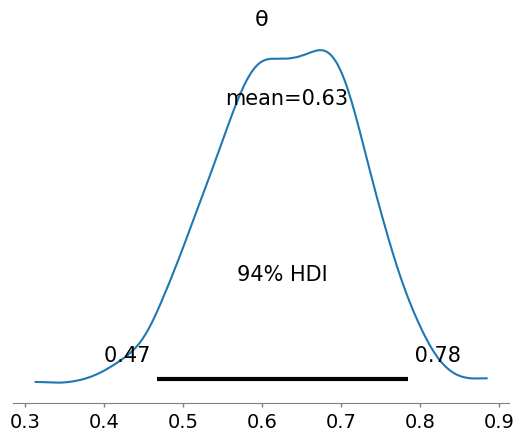

In [ ]:
#vizualize the 1000 samples from the pymc model of the posterior
az.plot_posterior(idata_cmppct)

<Axes: >

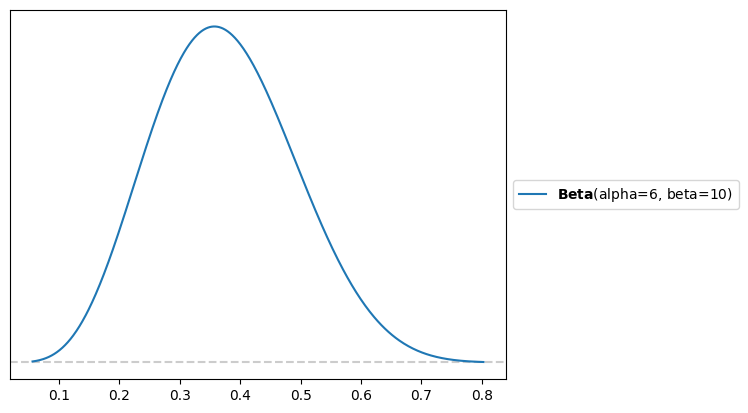

In [ ]:
analytic_cmppct=pz.Beta(alpha=6,beta=10)
analytic_cmppct.plot_pdf()

<Axes: title={'center': 'θ'}>

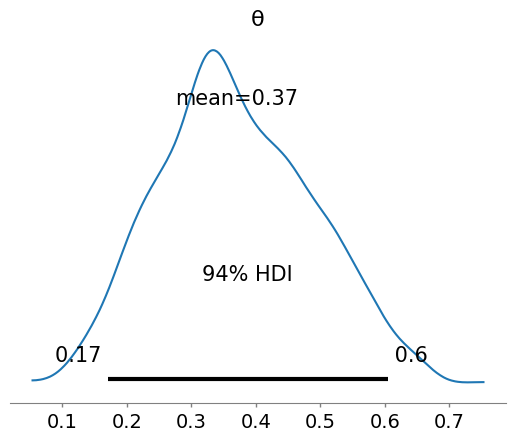

In [ ]:
az.plot_posterior( {'θ' : analytic_cmppct.rvs(1000)} )

In [30]:
pm.sample_posterior_predictive(idata_cmppct, model=DJ8_cmppct_model, extend_inferencedata=True)

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

In [40]:
cmppct_data_2324 = np.repeat([1,0], repeats = [292,75])

In [41]:
with pm.Model() as DJ8_cmppct_2324_model:

  θ = pm.Beta('θ' , alpha = 117. , beta = 43.)


  y = pm.Bernoulli('y', p = θ, observed = cmppct_data_2324)


  idata_cmppct_2324 = pm.sample(2000)

<Axes: title={'center': 'θ'}>

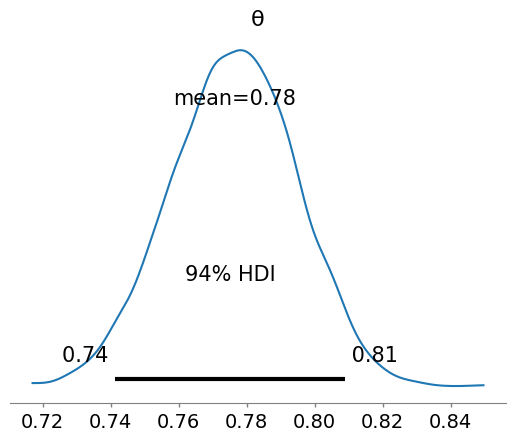

In [42]:
az.plot_posterior(idata_cmppct_2324)

In [43]:
pm.sample_posterior_predictive(idata_cmppct_2324, model=DJ8_cmppct_2324_model, extend_inferencedata=True)

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

# Conclusion

In conclusion, Daniel Jones will have a compltion percentage of about 78%. I think that this estimate is a little generous but I would personally love for it to come true. We'll see over the course of the season as the Giants take on one of their most difficult schedules in years.